<a href="https://colab.research.google.com/github/AnishaA-git/SMS-Spam-Detection/blob/master/Micro_Factor_Spam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Factor: **SPAM**

Objective: **Spam Detection Approach for Secure Mobile Message Communication**

Article link: https://www.sciencedirect.com/science/article/pii/S0952197619302155#tbl1

Approaches:
1. Content Based: **character frequency mostly called bag of words**
2. Non-Content Based: detecting anomalies, **static measure that is the size of the message and time stamp**
3. Hybrid: **combine features** from content and non-content based approaches for classification purposes

We’ll load our dataset now, and let’s have a look at it. There are two columns; one is “label”, the other is the main message on which processing will happen (The main message). We will build a binary classification model to detect whether a text message is spam or not.

**Objective**: we’ll convert our data into vectors using the Bag-of-Words model. Then, finally, we have to convert our categorical variable (“label”) into numerical numbers to feed it to our model.

In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

%config InlineBackend.figure_format = 'retina'

In [ ]:
filename = "https://raw.githubusercontent.com/AnishaA-git/SMS-Spam-Detection/master/spam.csv"
data = pd.read_csv(filename, encoding='latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
data.shape

(5572, 5)

# Data preprocessing

Data preprocessing involves,

1. Removing unnecessary columns and renaming features name
2. Numericalizing categorical feature which is our label (ham or sam)
3. Genearting corpus from raw sms mesages (stopwords,lowering,stemming)
4. Creating bag of words model using CountVectorizer 

In [ ]:
#drop unwanted columns and name change
data = data.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
data = data.rename(columns={"v1":"label", "v2":"text"})

## Adding Categorical value for label

In [ ]:
# convert label to a numerical variable
data['label_cat'] = data.label.map({'ham':0, 'spam':1})

In [ ]:
data.head()

,label,text,label_cat
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [ ]:
#count observations in each label
data.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

From above, we can say datasets are imbalance hence we can perform certain sampling technique to make it balance datasets. I'm not doing it here to make it more simpler.

## Feature creation i.e bags of words model from sms texts

In [ ]:
#text transformation (stopwords,lowering,stemming) and creating bag of words model using CountVectorizer
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [ ]:
corpus = []
for i in range(0, len(data)):
    review = re.sub('[^a-zA-Z]', ' ', data['text'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    nltk.download('stopwords')
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

# Creating Bag of Words Model

In [ ]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(corpus).toarray()
y = data.iloc[:, 0].values

In [ ]:
#showing first and last 20 features names
print(cv.get_feature_names()[0:20])
print(cv.get_feature_names()[-20:])

['aa', 'aah', 'aaniy', 'aaooooright', 'aathi', 'ab', 'abbey', 'abdomen', 'abeg', 'abel', 'aberdeen', 'abi', 'abil', 'abiola', 'abj', 'abl', 'abnorm', 'abouta', 'abroad', 'absenc']
['yunni', 'yuo', 'yuou', 'yup', 'yupz', 'zac', 'zaher', 'zealand', 'zebra', 'zed', 'zero', 'zf', 'zhong', 'zindgi', 'zoe', 'zogtoriu', 'zoom', 'zouk', 'zs', 'zyada']


In [ ]:
print(X.shape,y.shape)

(5572, 6221) (5572,)


In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [ ]:
print(X_train.shape,X_test.shape)

(4457, 6221) (1115, 6221)


In [ ]:
#Visualisations
from wordcloud import WordCloud

In [ ]:
ham_words = ''
spam_words = ''
spam = data[data.label_cat == 1]
ham = data[data.label_cat == 0]

In [ ]:
for val in spam.text:
    text = re.sub('[^a-zA-Z]', ' ', val)
    text = text.lower()
    text = text.split()
    ps = PorterStemmer()
    text = [ps.stem(word) for word in text if not word in set(stopwords.words('english'))]
    for words in text:
        spam_words = spam_words + words + ' '
    
for val in ham.text:
    text = re.sub('[^a-zA-Z]', ' ', val)
    text = text.lower()
    text = text.split()
    ps = PorterStemmer()
    text = [ps.stem(word) for word in text if not word in set(stopwords.words('english'))]
    for words in text:
          ham_words = ham_words + words + ' '
      

In [ ]:
# Generate a word cloud image
spam_wordcloud = WordCloud(width=600, height=400).generate(spam_words)
ham_wordcloud = WordCloud(width=600, height=400).generate(ham_words)

## BoW for Spam Words

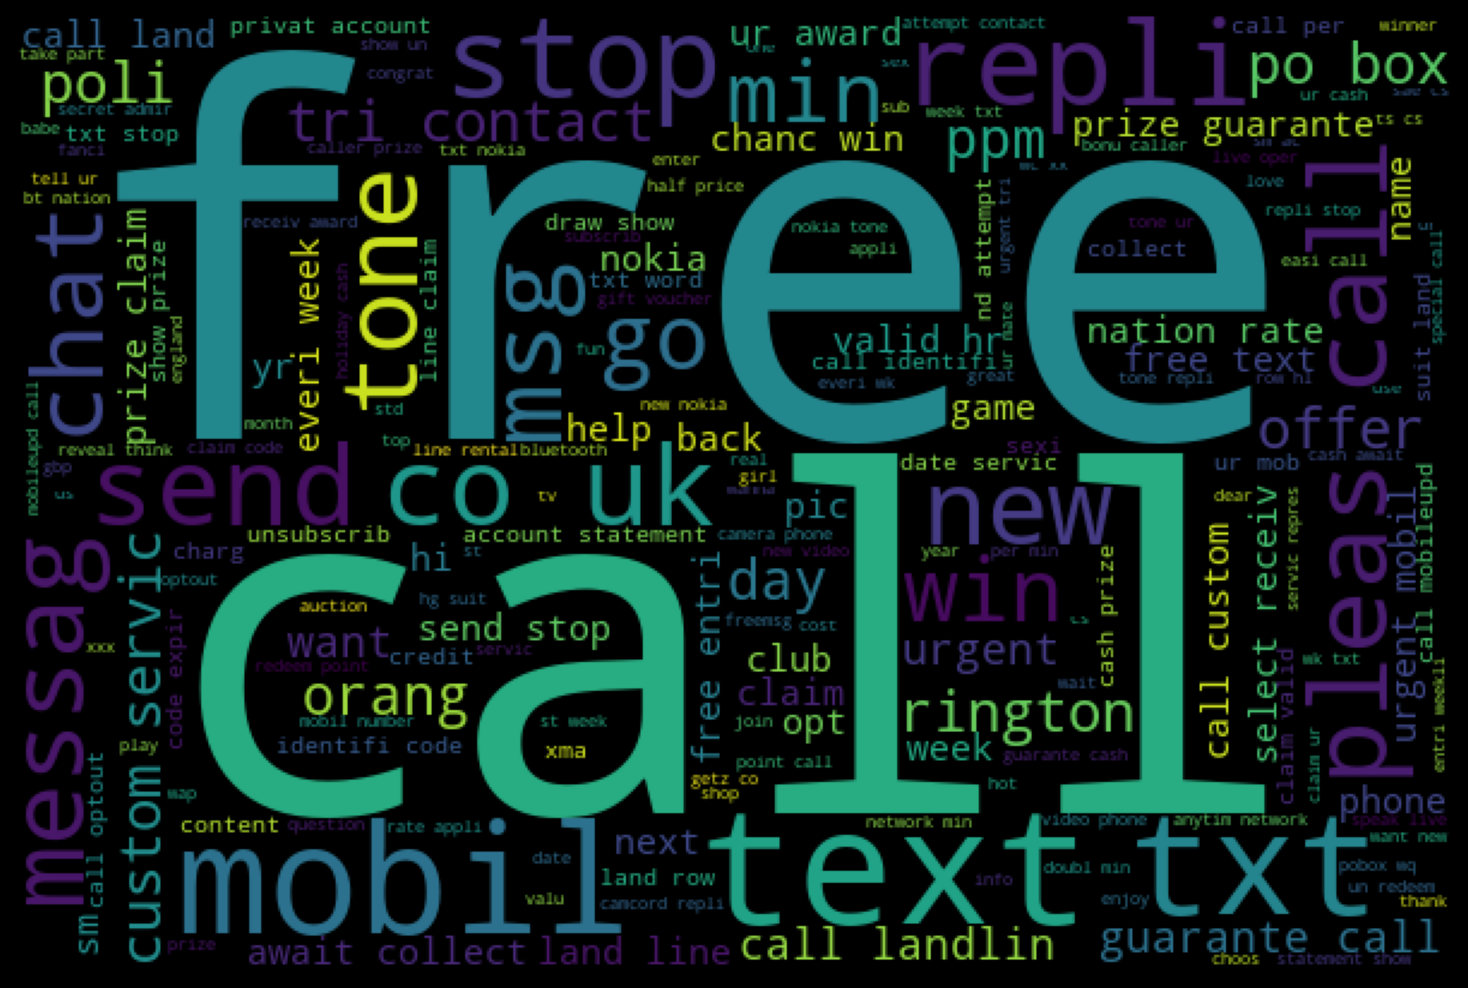

In [ ]:
#Spam Word cloud
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

## BoW for Non-Spam Words

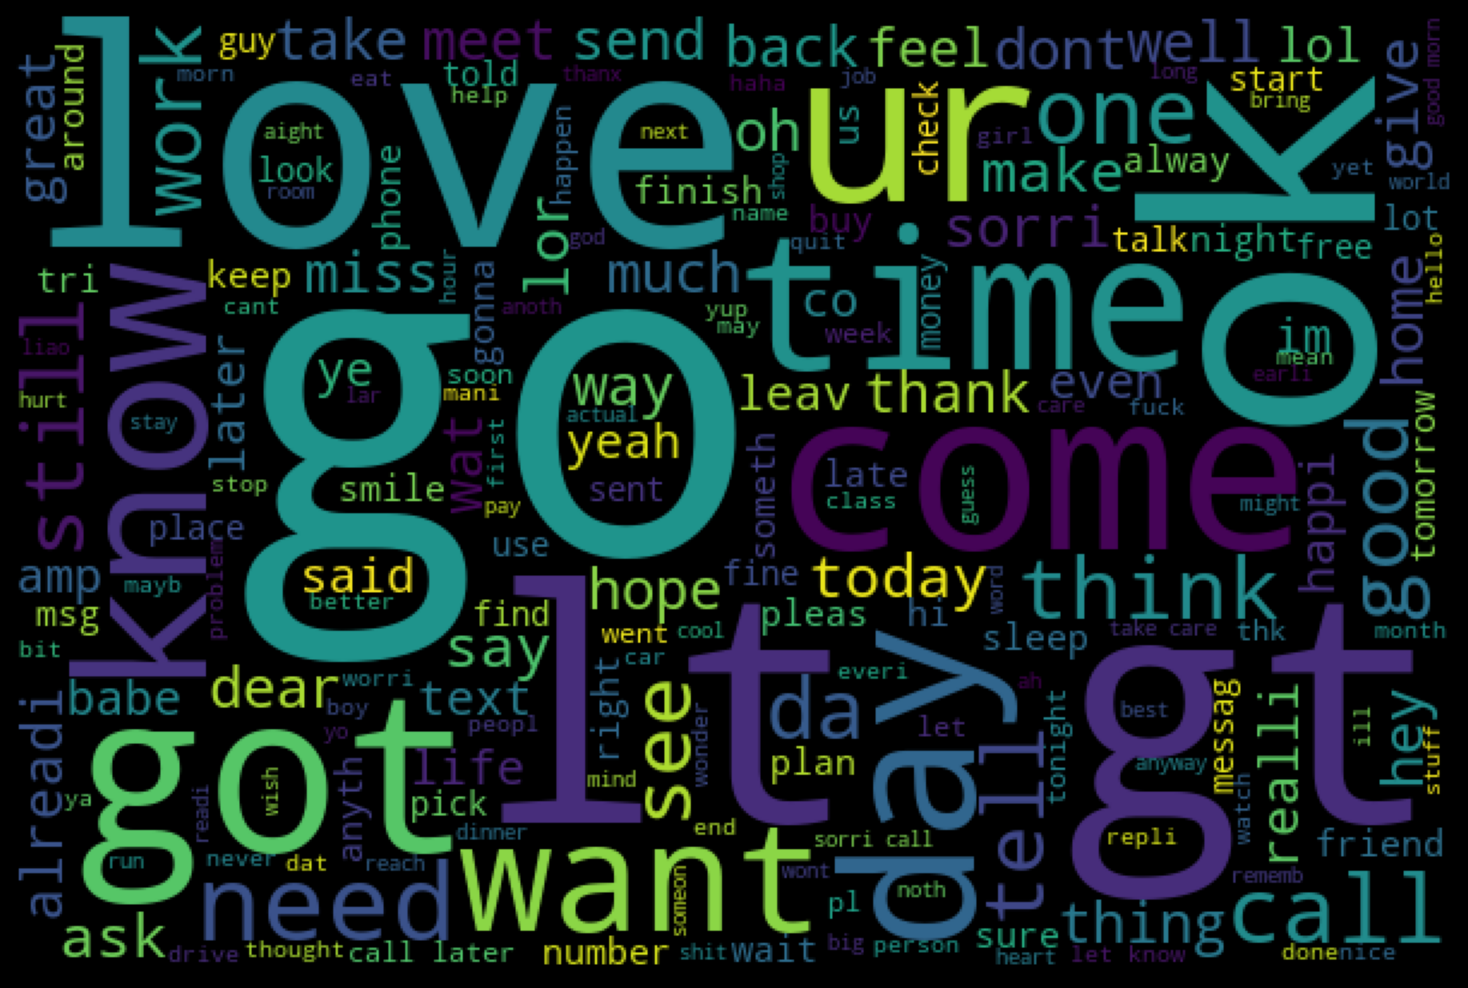

In [ ]:
#Ham word cloud
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(ham_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# Adding Text Length as new Feature

In [ ]:
data['Mes_len'] = data['text'].apply(len)
data.head()

,label,text,label_cat,Mes_len
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61


In [ ]:
data.groupby('label').describe().T

label                    ham        spam
label_cat count  4825.000000  747.000000
          mean      0.000000    1.000000
          std       0.000000    0.000000
          min       0.000000    1.000000
          25%       0.000000    1.000000
          50%       0.000000    1.000000
          75%       0.000000    1.000000
          max       0.000000    1.000000
Mes_len   count  4825.000000  747.000000
          mean     71.023627  138.866131
          std      58.016023   29.183082
          min       2.000000   13.000000
          25%      33.000000  132.500000
          50%      52.000000  149.000000
          75%      92.000000  157.000000
          max     910.000000  224.000000

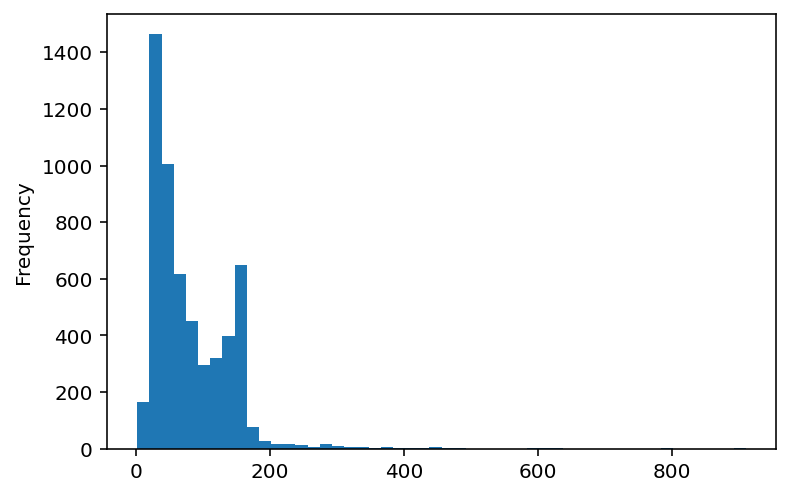

In [ ]:
data['Mes_len'].plot(kind='hist',bins=50)
plt.show()

Text(0.5, 1.0, 'listing_type')

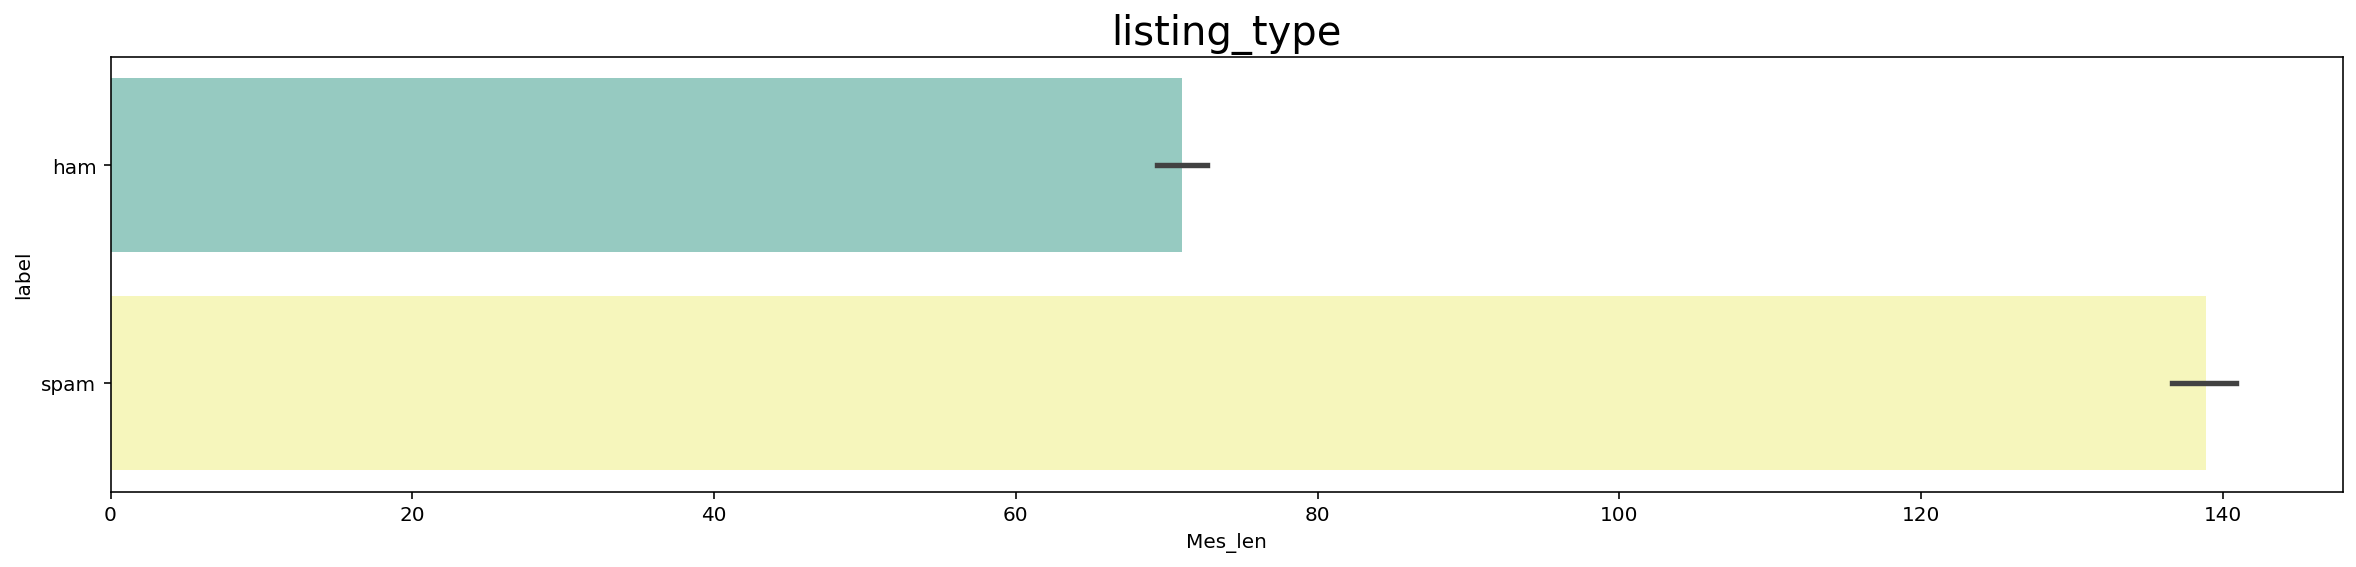

In [ ]:
# sns.barplot(data['Mes_len'],data['label'])
# plt.show()
fig_dims = (20, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x='Mes_len',y='label',ax=ax,data=data,palette='Set3')
plt.title("listing_type",fontsize=20)

In [ ]:
data.groupby('label')['Mes_len'].max()

label
ham     910
spam    224
Name: Mes_len, dtype: int64

In [ ]:
# lets check the message with the longest length for both classes
print(data.loc[data['Mes_len']==910,'text'][1084])

For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later..


In [ ]:
print(data.loc[data['Mes_len']==224,'text'][1020])

Good afternoon on this glorious anniversary day, my sweet J !! I hope this finds you happy and content, my Prey. I think of you and send a teasing kiss from across the sea coaxing images of fond souveniers ... You Cougar-Pen


This means that the classification seems to be apt enough to be taken as correct

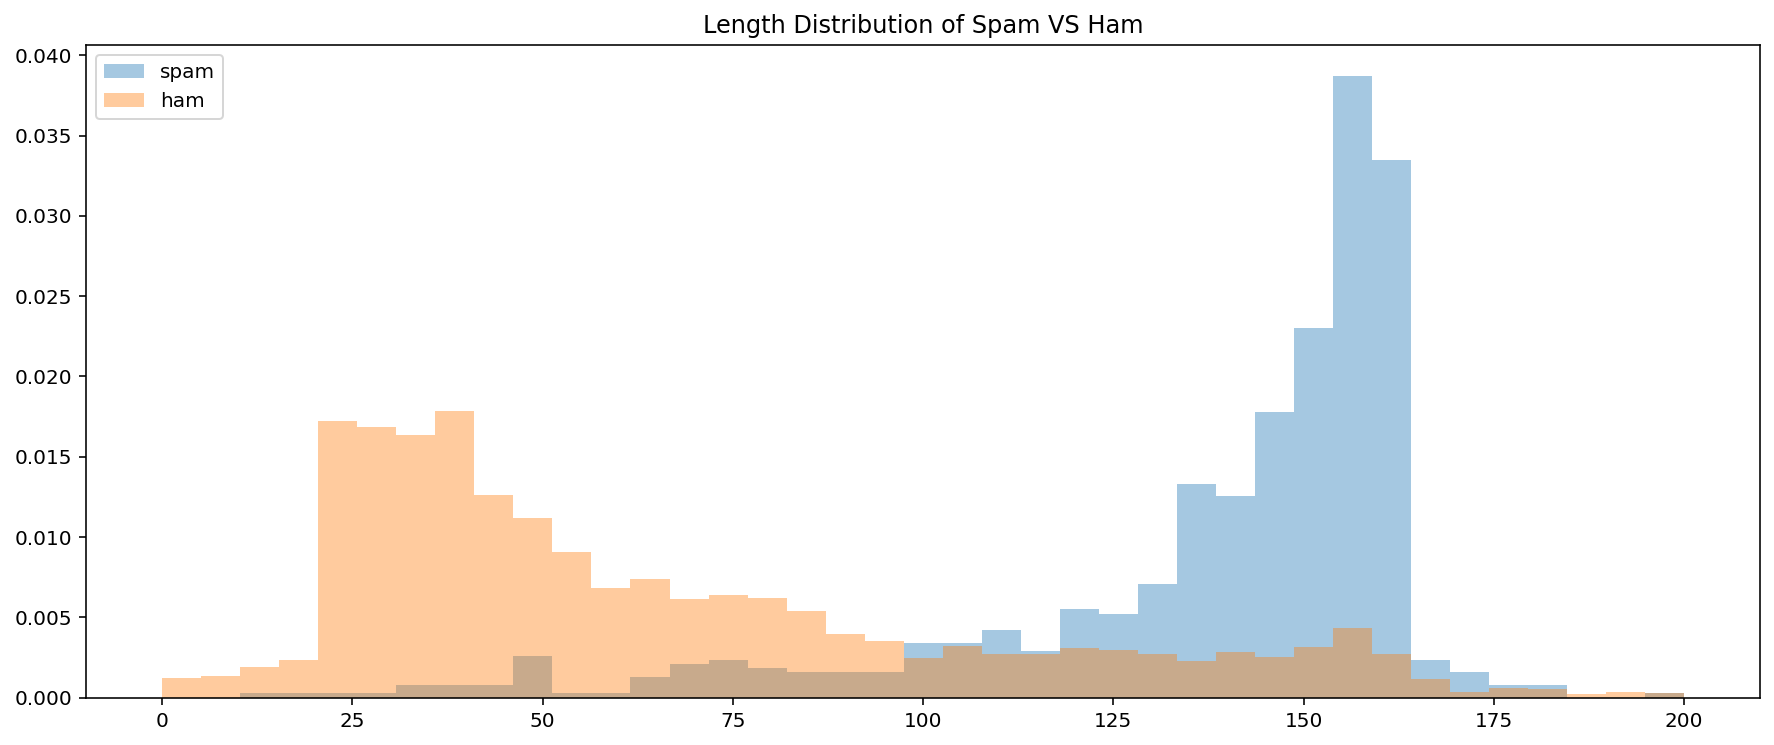

In [ ]:
# Plot the distribution of text length (spam vs ham)
plt.figure(figsize=(15,6))
plt.hist(data[data['label_cat']==1]['Mes_len'],bins = np.linspace(0,200,num=40),alpha=0.4,label='spam',density=True)
plt.hist(data[data['label_cat']==0]['Mes_len'],bins = np.linspace(0,200,num=40),alpha =0.4,label ='ham', density=True)
plt.legend(loc ='upper left')
plt.title('Length Distribution of Spam VS Ham')
plt.show()

It means usually shorter messages are hams and longer messages are spams. Hence, classifiers such as Naive Bayes might turnout to be a success over here

# Adding Clean Text to Dataset

In [ ]:
import string
from nltk.corpus import stopwords

def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    STOPWORDS = stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure']
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return ' '.join([word for word in nopunc.split() if word.lower() not in STOPWORDS])

In [ ]:
data['clean_text'] = data.text.apply(text_process)
data.head()

,label,text,label_cat,Mes_len,clean_text
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,Go jurong point crazy Available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,0,29,Ok lar Joking wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,Free entry wkly comp win FA Cup final tkts 21s...
3,ham,U dun say so early hor... U c already then say...,0,49,dun say early hor c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,Nah think goes usf lives around though


In [ ]:
type(stopwords.words('english'))

list

# Tokenization

Now let's "tokenize" these messages. Tokenization is just the term used to describe the process of converting the normal text strings in to a list of tokens (words that we actually want).

As deep learning models do not understand text, let’s convert text into numerical representation. For this purpose, a first step is Tokenization.
Tokenizer() does all the required pre-processing such as
1. tokenize into word or character — here we use at word level
2. num_words for maximum number of unique tokens hence we can filter out rare words
3. filter out punctuation terms
4. convert all words to lower case
5. convert all words to integer index

## Non-Spam Tokenization

In [ ]:
from collections import Counter

words = data[data.label=='ham'].clean_text.apply(lambda x: [word.lower() for word in x.split()])
ham_words = Counter()

for msg in words:
    ham_words.update(msg)
    
print(ham_words.most_common(50))

[('get', 303), ('ltgt', 276), ('ok', 272), ('go', 247), ('ill', 236), ('know', 232), ('got', 231), ('like', 229), ('call', 229), ('come', 224), ('good', 222), ('time', 189), ('day', 187), ('love', 185), ('going', 167), ('want', 163), ('one', 162), ('home', 160), ('lor', 160), ('need', 156), ('sorry', 153), ('still', 146), ('see', 137), ('n', 134), ('later', 134), ('da', 131), ('r', 131), ('back', 129), ('think', 128), ('well', 126), ('today', 125), ('send', 123), ('tell', 121), ('cant', 118), ('ì', 117), ('hi', 117), ('take', 112), ('much', 112), ('oh', 111), ('night', 107), ('hey', 106), ('happy', 105), ('great', 100), ('way', 100), ('hope', 99), ('pls', 98), ('work', 96), ('wat', 95), ('thats', 94), ('dear', 94)]


## Spam Tokenization

In [ ]:
words = data[data.label=='spam'].clean_text.apply(lambda x: [word.lower() for word in x.split()])
spam_words = Counter()

for msg in words:
    spam_words.update(msg)
    
print(spam_words.most_common(50))

[('call', 347), ('free', 216), ('txt', 150), ('mobile', 123), ('text', 120), ('claim', 113), ('stop', 113), ('reply', 101), ('prize', 92), ('get', 83), ('new', 69), ('send', 67), ('nokia', 65), ('urgent', 63), ('cash', 62), ('win', 60), ('contact', 56), ('service', 55), ('please', 52), ('guaranteed', 50), ('customer', 49), ('16', 49), ('week', 49), ('tone', 48), ('per', 46), ('phone', 45), ('18', 43), ('chat', 42), ('awarded', 38), ('draw', 38), ('latest', 36), ('å£1000', 35), ('line', 35), ('150ppm', 34), ('mins', 34), ('receive', 33), ('camera', 33), ('1', 33), ('every', 33), ('message', 32), ('holiday', 32), ('landline', 32), ('shows', 31), ('å£2000', 31), ('go', 31), ('box', 30), ('number', 30), ('apply', 29), ('code', 29), ('live', 29)]
